In [1]:
def image_crop(file, image_width, image_height, cropped_width, cropped_height):
    cropped_images = []
    x = 0
    x_center = image_width // 2
    y_center = image_height // 2
    
    while x < image_width:
        y = 0
        while y < image_height:
            cropped_image = file[x : x + cropped_width, y : y + cropped_height]
            cropped_images.append(cropped_image)
            y += cropped_height
        x += cropped_width
    
    center_image = file[x_center - cropped_width // 2 : x_center + cropped_width // 2,
                       y_center - cropped_height // 2 : y_center + cropped_height // 2]
    
    cropped_images.append(center_image)
    
    return cropped_images

In [2]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [3]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf

img_dir = './binary_cnn_majority/test'
#categories = os.listdir(img_dir)
categories = ['ad', 'non_ad']

image_width = 180 # 사이즈 수정
image_height = 180

X = []
y = []
X_original = []
y_original = []
index = []
files = []
filenames = []

for i, category in enumerate(categories):
    img_detail = img_dir + '/' + category
    files.append(glob.glob(img_detail + "/*.jpg"))
    index.append(i)
    
for file, i in zip(files, index):
    for f in file:
        img = data_generator(f, image_width, image_height)
        original_data = np.asarray(img)
        X_original.append(original_data)
        y_original.append(i)
        
        cropped_images = image_crop(img, image_width, image_height, image_width // 2, image_height // 2)
        
        for cropped_image in cropped_images:
            data = np.asarray(cropped_image)

            head, tail = os.path.split(f)
            filenames.append(tail)
        
            X.append(data)
            y.append(i)
    
X = np.array(X)
y = np.array(y)
X_original = np.array(X_original)
y_original = np.array(y_original)

X = X.astype('float32') / 255

print(len(X), len(y))
print(len(X_original), len(y_original))

"""인자 바꾸기"""



3195 3195
639 639


'인자 바꾸기'

In [19]:
#import keras.backend.tensorflow_backend as K

#with K.tf_ops.device('/device:GPU:0'):
 #   prediction = model.predict(X)
  #  np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지



In [4]:
def print_scores(X, y, prediction):
    print('confusion matrix 결과')
    print(confusion_matrix(y, prediction, labels=[0, 1])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y, prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y, prediction, average=None) * 100)))

    #print('evaluate값')
    #print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y, prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y, prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y, prediction, average='macro') * 100))

In [5]:
# import keras.backend.tensorflow_backend as K

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

"""수정 필요한 부분"""

# validation_rate = [0.05, 0.1, 0.15, 0.2]  # 리스트 바꾸기
#image_size = [32, 40, 50, 64, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
  #           190, 200, 210, 220, 230, 240, 256]
# Dropout = []
#model_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

batch_list = [16, 32, 64, 128, 256]


model_evaluate = []
f1 = []
precision = []
recall = []

for batch in batch_list: #반복문 요소 바꾸기
    model = load_model('./binary_cnn_majority/model/size/binary_model_saved180.h5')
    ##############파일 인자 수정하기 ##############
    # with K.tf_ops.device('/device:GPU:0'):
    prediction = model.predict(X)
    np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
        
    new_prediction = []    
    count = []
    
    for p in prediction:
        is_ad = 0
        not_ad = 0
        amax = []
        
        count.append(p)
        
        if len(count) == 5:
            for c in count:
                amax.append(c.round())
                if c.round() == 0:
                    is_ad += 1
                elif c.round() == 1:
                    not_ad += 1
                    
            if is_ad > not_ad:
                new_prediction.append(0)
            else:
                new_prediction.append(1)
                
            count = []
        
        elif len(count) < 5:
            continue
                
    #prediction = np.round(prediction)
    
    print('****** 배치 사이즈 ****** : ' + str(batch)) # 수정
    
    
    print('개별 결과')
    print(len(y), len(prediction))
    #print_scores(X, y, prediction)
    #model_evaluate.append(model.evaluate(X, y)[1] * 100)
    #precision.append(precision_score(y, prediction, average='macro') * 100)
    #recall.append(recall_score(y, prediction, average='macro') * 100)
    #f1.append(f1_score(y, prediction, average='macro') * 100)
    
    print('투표 결과')
    print(len(y_original), len(new_prediction))
    print_scores(X_original, y_original, new_prediction)
    #model_evaluate.append(model.evaluate(X_original, y_original)[1] * 100)
    precision.append(precision_score(y_original, new_prediction, average='macro') * 100)
    recall.append(recall_score(y_original, new_prediction, average='macro') * 100)
    f1.append(f1_score(y_original, new_prediction, average='macro') * 100)
    
"""수정 필요한 부분"""

****** 배치 사이즈 ****** : 16
개별 결과
3195 3195
투표 결과
639 639
confusion matrix 결과
[[303  16]
 [ 21 299]]
precision 개별값
['93.52%', '94.92%']
recall 개별값
['94.98%', '93.44%']
f1 점수
94.21%
precision 평균값
94.22%
recall 평균값
94.21%
****** 배치 사이즈 ****** : 32
개별 결과
3195 3195
투표 결과
639 639
confusion matrix 결과
[[303  16]
 [ 21 299]]
precision 개별값
['93.52%', '94.92%']
recall 개별값
['94.98%', '93.44%']
f1 점수
94.21%
precision 평균값
94.22%
recall 평균값
94.21%
****** 배치 사이즈 ****** : 64
개별 결과
3195 3195
투표 결과
639 639
confusion matrix 결과
[[303  16]
 [ 21 299]]
precision 개별값
['93.52%', '94.92%']
recall 개별값
['94.98%', '93.44%']
f1 점수
94.21%
precision 평균값
94.22%
recall 평균값
94.21%
****** 배치 사이즈 ****** : 128
개별 결과
3195 3195
투표 결과
639 639
confusion matrix 결과
[[303  16]
 [ 21 299]]
precision 개별값
['93.52%', '94.92%']
recall 개별값
['94.98%', '93.44%']
f1 점수
94.21%
precision 평균값
94.22%
recall 평균값
94.21%
****** 배치 사이즈 ****** : 256
개별 결과
3195 3195
투표 결과
639 639
confusion matrix 결과
[[303  16]
 [ 21 299]]
precision 개별값
['93.52%', '9

'수정 필요한 부분'

In [22]:
#for i, pred in enumerate(prediction):
 #   if pred >= 0.5: print("해당 " + filenames[i] + "  이미지는 비광고 로 추정됩니다.")
  #  else : print("해당 " + filenames[i] + "  이미지는 광고 로 추정됩니다.")

'수정 필요한 부분'

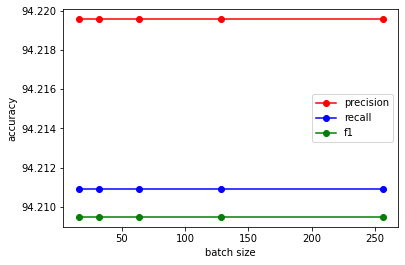

In [6]:
import matplotlib.pyplot as plt


"""수정 필요한 부분"""

plt.plot(batch_list, precision, 'ro-', label='precision') # 리스트 수정
plt.plot(batch_list, recall, 'bo-', label='recall')
plt.plot(batch_list, f1, 'go-', label='f1')
#plt.plot(batch_list, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('batch size') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""